# The Future Of Space Travel: Exploring the Three-Body Problem

Simon Fields

## Table of Contents

* [Introduction](#introduction)
* [Model](#model)
* [Numerical Methods](#numerical-methods)
* [Results](#results)
* [Analysis](#analysis)
* [Summary](#summary)
* [References](#references)




<a id='introduction'></a>

# Introduction 


In celestial mechanics, the physics of a two body problem is simple and can be solved using Newton’s law of Gravitation. With these problems, you can look at systems such as the Earth-Moon or Earth-Sun, or any other conceivable pair of bodies. However, this law doesn’t apply to systems with more than two bodies. When a third body is added to the system, the physics of the system changes tremendously, and the system becomes more difficult to visualize. The three body system is also called the n-body system for this reason - as you add bodies to a system, more calculations are necessary to track each object. Three-body problems are essential in the advancement of manned space flight and interplanetary travel. One example of a relevant industry would be space stations, whose orbits could be affected by bodies in our solar system over the course of time.

Mathematicians Enrst Bruns and Henri Poincaré theorized that there were no general analytical solutions to a three-body problem, due to a few characteristics: future states are highly dependent on initial conditions orbits tend toward unpredictable patterns, and one of the three bodies is almost always ejected from the system. However, many approximate solutions have been found and are familiar to most people.

Examples of solutions do exist, contrary to our friends Bruns and Poincaré (Example). For example, the figure-eight model can be applied to a system with three equal mass bodies. Approximating a solution also can allow us to ignore the gravitational effects of a third body under certain circumstances, which allows for a system of bodies to be broken up into many two-body systems (like the solar system, or a system of a planet and its moons) Additionally, Euler and Lagrange found a system of five points between large bodies in which a smaller body (whose gravitational effects on the two larger bodies is ignored) can maintain its position relative to the larger ones. (Side note: while they are often called Lagrangian points, Leanhard Euler was the scientist to actually discover the majority of the points.)

![analytical_solns.png](images/analytical_solns.png)

#### Example
Top left: Model of all satellites in low Earth Orbit

Top right: Figure eight model

Bottom left: Two independent eliptical orbits as a solution to a three-body problem

Bottom right: The system of Lagrangian points between the Earth and the Sun


Stable equilibrium exists at L4 and L5 which is different from points L1-L3. Objects that are in L1-L3 have a tendency to fall out of orbit, and would have to be manually adjusted in order to maintain position. Due to the gravity of both large bodies in the system, objects in L4 or L5 maintain a kidney-shaped orbit at the LP. One way to describe the difference would be “marble perched atop a bowling ball” versus “marble at the bottom of a bowl” (NASA)

One consequence of the equilibrium that exists at L4 and L5 are the congregation of objects. Larger bodies in our solar system, such as Jupiter or Saturn, have moons in their LP. This is different for bodies like Earth or Mars, who lack many significant objects in their LP. This brings up the possibility of a man made space craft being placed in one of the Earth's LP's, either with the moon or the Sun. L4 and L5 have the stability necessary, but adjustments can be made to objects in L1-L3 to maintain position. 

A new issue then arises that comes from the wild characteristics of a three-body system. How will the forces of bodies in our solar system affect man made craft placed in orbit of the Earth? By looking at the three-body system between the Earth, Sun, and Jupiter, we should be able to observe the effects of Jupiter’s gravitational pull on the Earth, which can tell us about the physics of larger bodies and their effects on smaller ones. 


<a id='model'></a>

# Model

The model I will be using involves Newton's law of gravitation, 
                                    $F = G\frac{(M_{1}m_{2})}{r^2}$
                                    

For the first graph of Earth's orbit, I needed to calculate mean orbital speed

### $v\approx\frac{2\pi\alpha}{T}$ 
as well as the Orbital Period

$T = 2\pi\sqrt {a^3/\mu}$


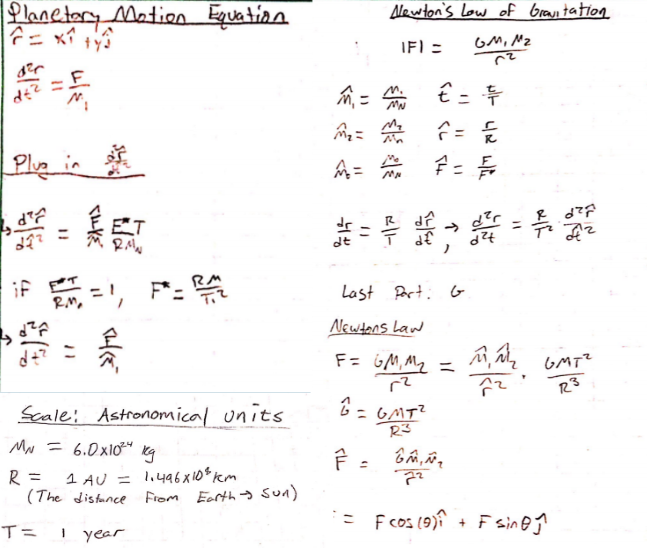

In [18]:
Image(filename = PATH + "comp_model.png", width=500, height=500)

Here is the handwritten math for the three-body problem. The differential equations are missing, which are: 
$$    \nonumber    \frac{d \bf{\hat{r}}}{d \hat{t}} = \hat{\bf{v}} \hspace{5cm}$$
    
$$\frac{d \bf{\hat{v}}}{d \hat{t}} = \frac{\bf{\hat{F}}}{\hat{M_E} } \hspace{5cm}$$



An additional important step in celestial mechanics is to make some generalizations: the Sun is non-moving and placed at origin; all bodies affecting the system are represented; all bodies in the system are moving along the same plane. These are necessary to properly model the system. Also, due to the sheer vastness of the universe, proper scaling needs to be done. This involves normalizing measurments, including mass, length, and time. This specific case looks at the system between the Sun, Earth, and Jupiter. Scaling factors used are::

$$\nonumber T = 365 \times 24\times 60 \times 60 \,seconds = 1.0 \, year$$
$$R = 1.5 \times 10^{11} \,m = 1.0 \, AU $$
$$M = 6 \times 10^{24} \,kg = 1.0 \, M_E$$

One AU (Astronomical Unit) is a standard distance in celestial physics, and is roughly the distance between the Earth and Sun. The mass is also normalized in regard to the Earth as the smaller body in the system. This makes the process of mass scaling later on easier to implement. 

Newton's Force law can be written as
$$
     \nonumber
    |{\bf{F}}| = \frac{GM_EM_S}{|\bf{r}|^2} = \frac{\hat{M}_E \hat{M}_S}{|\hat{\bf{r}}|^2}\frac{GM^2}{R^2} 
$$,

using the normalized variables (above) we find
$$
    \hat{G} = \frac{GMT^2}{R^3}
$$

So now our Force equation is $$ |{\bf{\hat{F}}}| = \frac{\hat{G} \hat{M}_E \hat{M}_S}{|\hat{\bf{r}}|^2}$$


Finally, due to the trigonometry of the plane we are viewing the bodies in, we can write
$$
    \nonumber
    \bf{F} = |\bf{F}|\cos(\theta) \hat{\bf{i}}  + |\bf{F}|\sin(\theta) \hat{\bf{j}}
$$
where
$$
    \theta = \tan^{-1}\frac{y}{x}
$$

Using these equations, we can calculate all relevant forces on a body in our system. Then, we must plot the vectors at different timesteps to simulate the orbits within the system.


<a id='numerical-methods'></a>
# Numerical Methods


In [3]:
import time
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [4]:
#steps = 365
#r = 1 AU
#dt = 1/steps
#mu = 4*np.pi**2

def earth_orbit(steps=365,r=1):
    '''
    plots the orbit of Earth for
    the standard number of days in a year, 365.
    
    args: 
    steps = points plotted on graph, on scale of days
    r = distance from sun, defuault is 1 AU
    '''
    mu = 4*np.pi**2
    
    dt = 1./steps
    x = np.zeros(steps)
    y = np.zeros(steps)
    v_x = np.zeros(steps)
    v_y = np.zeros(steps)
    
    # initialize orbit
    x[0] = r
    v_y[0] = np.sqrt(mu/r) # mean orbital speed
    
    for step in range(0,steps-1):
        v_x[step+1] = v_x[step]-(4*np.pi**2*x[step]/(r**3))*dt
        x[step+1] = x[step]+v_x[step+1]*dt
        v_y[step+1]=v_y[step]-4*np.pi**2*y[step]/(r**3)*dt
        y[step+1]=y[step]+v_y[step+1]*dt
        
    plt.plot(x,y,'bo')
    plt.axis('equal')
    plt.show()

I first modeled Giordano's two body problem, specifically modeling the Earth's orbit. This method uses standard celestial mechanics, which assumes the distance between the sun and earth is one AU. 

In [5]:
# Forces on all bodies in the system

def force_10(r):
    '''Calculates force of body 1 (Earth) on the main body (Sun) 
        
    '''
    F=np.zeros(2)
    Fmag=Ghat*Mb1*Mb0/(LA.norm(r)+1e-20)**2
    theta=math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0]=Fmag*np.cos(theta)
    F[1]=Fmag*np.sin(theta)
    if r[0]>0:
        F[0]=-F[0]
    if r[1]>0:
        F[1]=-F[1]
        
    return F

def force_20(r):
    '''
    Mass of larger body (body 2, Jupiter) on main body (Sun)
    
    '''
    F = np.zeros(2)
    Fmag = Ghat*Mb2*Mb0/(LA.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0]=Fmag*np.cos(theta)
    F[1]=Fmag*np.sin(theta)
    if r[0]>0:
        F[0]=-F[0]
    if r[1]>0:
        F[1]=-F[1]
        
    return F
        
def force_12(r1,r2):
    '''
    Force of smaller body on larger body (Earth and Jupiter)
    '''
    r = np.zeros(2)
    F = np.zeros(2)
    r[0] = r1[0] - r2[0]    
    r[1] = r1[1] - r2[1]    
    Fmag = Ghat*Mb1*Mb2/(LA.norm(r)+1e-20)**2
    theta = math.atan(np.abs(r[1])/(np.abs(r[0])+1e-20))
    F[0] = Fmag * np.cos(theta)
    F[1] = Fmag * np.sin(theta)
    if r[0] > 0:
        F[0] = -F[0]
    if r[1] > 0:
        F[1] = -F[1]
        
    return F

def force(r,body,ro,vo):
    '''
    Generalized forces function that differentiates between bodies'''
    if body == 'body1':
        return force_10(r)+force_12(r,ro)
    if body == 'body2':
        return force_20(r)-force_12(r,ro)
    
def dr_dt(t,r,v,body,ro,vo):
    '''
    One of the Differential Equations to solve
    '''
    return v
    
def dv_dt(t,r,v,body,ro,vo):
    '''
    2nd differential equation necessary to solve 3-body problem
    '''
    F = force(r,body,ro,vo)
    if body == 'body1':
        y = F/Mb1
    if body == 'body2':
        y = F/Mb2
    return y 

These are all of the force functions. These are necessary to show the affect of gravity on the orbits. Additionally, there is a function used to combine the forces depending on which body is being plotted.

Near the bottom are the differential equation functions set up for Runge-Kutta below. These are the same as the model, so 
$$    \nonumber    \frac{d \bf{\hat{r}}}{d \hat{t}} = \hat{\bf{v}} \hspace{5cm}$$
    
$$\frac{d \bf{\hat{v}}}{d \hat{t}} = \frac{\bf{\hat{F}}}{\hat{M_E} } \hspace{5cm}$$
which uses the normalized masses of the bodies and the forces calculated in the functions.

In [6]:
def RK4(t,r,v,h,body,ro,vo):
    ''' 
    Uses a modified Runge-Kutta4 method to solve
    both of the differential equations dr/dt and dv/dt
    
    '''
    #k1a - k4a are dr/dt
    #k1b - k4b are dv/dt
    
    k1a = dr_dt(t,r,v,body,ro,vo)   
    k1b = dv_dt(t,r,v,body,ro,vo)
    
    k2a = dr_dt(t+0.5*h, r+0.5*h*k1a, v+0.5*h*k1b,body,ro,vo)
    k2b = dv_dt(t+0.5*h, r+0.5*h*k1a, v+0.5*h*k1b,body,ro,vo)
    
    k3a = dr_dt(t+0.5*h, r + 0.5*h*k2a, v+0.5*h*k2b,body,ro,vo)
    k3b = dv_dt(t+0.5*h, r + 0.5*h*k2a, v+0.5*h*k2b,body,ro,vo)
    
    k4a = dr_dt(t+h, r+h*k3a, v+h*k3b,body,ro,vo)   
    k4b = dv_dt(t+h, r+h*k3a, v+h*k3b,body,ro,vo)
    
    y0 = r + h*(k1a+2*k2a + 2*k3a + k4a)*(1/6)
    y1 = v + h*(k1b+2*k2b + 2*k3b + k4b)*(1/6)
    
    z = np.zeros([2,2])
    z = [y0, y1]
    
    return z

Adapted Runge-Kutta method to return an array of data for both ODEs at once. 

In [7]:
def PE_function(r):
    fmag = LA.norm(force_10(r))
    rmag = LA.norm(r)
    return -fmag*rmag

def KE_function(v):
    vn = LA.norm(v)
    return 0.5*Mb1*vn**2

def momentum(r,v):
    rn = LA.norm(r)
    vn = LA.norm(v)
    r = r/rn
    v = v/vn
    rdotv = r[0]*v[0]+r[1]*v[1]
    theta = math.acos(rdotv)
    return Mb1*rn*vn*np.sin(theta)

def AreaCalc(r1,r2):
    r1n = LA.norm(r1)
    r2n = LA.norm(r2)
    r1 = r1 + 1e-20
    r2 = r2 + 1e-20
    theta1 = math.atan(abs(r1[1]/r1[0]))
    theta2 = math.atan(abs(r2[1]/r2[0]))
    rn = 0.5*(r1n+r2n)
    del_theta = np.abs(theta1 - theta2)
    return 0.5*del_theta*rn**2

These are the trigonometric functions from the model as well as KE and PE, which are also necessary for plotting the positions of the bodies.

In [8]:
#def Earth_Jupiter(scalefactor=1):    

Mb0 = 2e30                        # Mass of largest body (sun) in kg            
Mb1 = 6e24                        # Mass of body 1 (Earth)                              
Mb2 = 1.9e27                      # Mass of body2 (Jupiter) in kg
G = 6.673e-11                     # Gravitational Constant
R = 1.496e11                      # 1 AU in Meters (normalizing distance)                                     
Mn = 6e24/Mb1                     # Normalizing mass
T = 365*24*60*60.0                # Normalizing time (1 orbit around the Sun is roughly 365 days, converted to seconds) 
Ghat = (Mn*G*T**2)/(R**3)           #Ghat function    
Mb1 = Mb1/Mn                      # Normalized mass of Earth
Mb0 = Mb0/Mn                      # Normalized mass of Sun  
Mb2 = Mb2*500/Mn                  # Normalized mass of Body 2 (scaled up to show change)
                                
ti = 0                            # initial time = 0
tf = 60                            # final time, 50 years of change
N = 200*tf                        # 200 points per rotation
t = np.linspace(ti,tf,N)          # array from ti to tf with N # of points
h = t[2]-t[1]                     # time step (uniform)

# Initialization
KE = np.zeros(N)                  # Kinetic E
PE = np.zeros(N)                  # Potential E
omega = np.zeros(N)               # Angular Momentum
Area = np.zeros(N)
r = np.zeros([N,2])               # position vector of body 1
v = np.zeros([N,2])               # velocity vector of body 1
r2 = np.zeros([N,2])              # position vector of body 2
v2 = np.zeros([N,2])              # velocity vector of body 2

ri = [1496e8/R,0]                 # initial position of body 1
r2i = [5.2,0]                     # initial position of body 2

vel1 = np.sqrt(Mb0*Ghat/ri[0])         # Magnitude of Body 1's initial velocity 
vel2 = 13.06e3 * T/R                   # Magnitude of Body 2's initial velocity 

vi = [0, vel1*1.0]                     # Initial velocity vector for Body1 along y direction as ri is on the x axis.
v2i = [0, vel2*1.0]                    # Initial velocity vector for Body 2

# Initial arrays
t[0] = ti
r[0,:] = ri
v[0,:] = vi
r2[0,:] = r2i
v2[0,:] = v2i
KE[0] = KE_function(v[0,:])
PE[0] = PE_function(r[0,:])
omega[0] = momentum(r[0,:],v[0,:])
Area[0] = 0

# Arrange vectors for plot
for i in range(0,N-1):
    [r[i+1,:],v[i+1,:]]=RK4(t[i],r[i,:],v[i,:],h,'body1',r2[i,:],v2[i,:])
    [r2[i+1,:],v2[i+1,:]]=RK4(t[i],r2[i,:],v2[i,:],h,'body2',r[i,:],v[i,:])
        
    KE[i+1] = KE_function(v[i+1,:])
    PE[i+1] = PE_function(r[i+1,:])
    omega[i+1] = momentum(r[i+1,:],v[i+1,:])
    Area[i+1] = Area[i] + AreaCalc(r[i,:],r[i+1,:])

This is the portion of my code that initializes the bodies and applies the functions. The next step in this process would be to remove hardcoding and generalize this for other systems. The complexity of three-body systems makes this step difficult, as does the normalizing process.

In [9]:
def orbit(fig,x,y,xl,yl,clr,lbl):
    '''
    function for plotting each body
    '''
    plt.figure(fig)
    plt.xlabel(xl)    
    plt.ylabel(yl)
    return plt.plot(x,y,clr, linewidth =1.0,label = lbl)

The last portion of code brings all the steps of code into a graph to visualize the data. The data should end up similar to the first Earth orbit graph, albeit altered due to the third body.

<a id='results'></a>
# Results


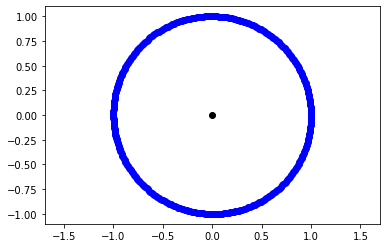

None


In [10]:
plt.plot(0,0,'ko',linewidth = 7)
print(earth_orbit())

#### Figure 1

This is a simple two-body model of the sun and the Earth. Due the the niceness of the equation, our orbit is perfectly spherical around the sun. The data is taken over a period of 365 'steps' or days, and uses the normalized 1 AU as the radius.

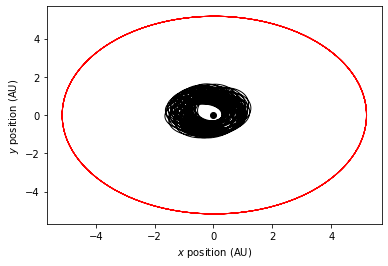

In [11]:
plt.plot(0,0,'ko',linewidth = 7)
orbit(1,r[:,0],r[:,1],'$x$ position (AU)',r'$y$ position (AU)','black','body1')
orbit(1,r2[:,0],r2[:,1],'$x$ position (AU)',r'$y$ position (AU)','red','body2')


#### Figure 2
This is the plot of the three-body system between the Earth, Jupiter, and the Sun. By placing the largest mass at the origin, I could track the orbits of the two remaining bodies. By using trig

![fullyear_approx.png](images/fullyear_approx.png)

This graph uses the same process as the previous one, with the only difference being no mass scaling on the larger body. Without 'Super Jupiter' we expect to see the results of an approximation between three bodies where one has a negligible mass due to the distance. We can also now hypothesize that if the larger body were closer, the effects of its gravitational pull would become clear.

![halfyear_full.png](images/halfyear_full.png)

#### Figure 4

These graphs also use the same algorithm, just over a time period of 6 Earth years (about half of Jupiter's full orbit). The upper graph shows clearly that the Earth's orbit has been offset by Jupiter, and the closeness of the orbit to origin on the bottom side confirms that the Earth is being pulled toward the larger mass. 

<a id='analysis'></a>
# Analysis


We can extrapolate a number of things from the data of the Earth's orbit changing due to Jupiter's gravitational pull. Firstly, looking at Fig. 3, we notice a virtually unchanging Earth orbit due to Jupiter. This does _not_ mean that Jupiter's gravitational pull is ineffective on the Earth. This simply confirms that for a three-body system of this scale, if one body's mass is negligible compared to the other two, the smaller body can be disregarded. This means that the Earth and Jupiter's orbits are a part of independent two body systems with the sun. However, this changes once the mass of one of the objects is scaled dramatically. By altering total simulation time, we can observe effects with only partial orbits.

I hypothesized that with simple normalized masses and no mass scaling, the Earth's orbit would be unchanged. This was the second task of my project. After calculating forces between bodies and getting vectors for velocity and positions using Jupiter's normalized mass, the data showed that a circular orbit.

This project's scope lies only on the Earth, the Sun, and Jupiter, but the goal is to present physics that can be applied to other three-body systems. This includes in the area local to the Earth, the moon, and mars, however I was challenged when normalizing new variables in these systems. However, tackling projects in space are costly and dangerous, so it is important to know as much as we can before starting.

Having an orbiting space station is important to the scientific community for a myriad of reasons. We can experience and study firsthand the effects of low gravity on humans, we can see further into the cosmos, and we can make interplanetary travel more attainable. For example, a rotating space tether orbiting in a Lagrange point can attach to small space craft leaving the Earth and transfer a large amount of momentum to it, allowing faster travel time as well as further capable traveling distance. In order for us to proceed with a project such as this, the physics of other bodies in our solar system must be studied intensively. 

<a id='summary'></a>
# Summary


### Scientific Summary
This project looked at the celestial mechanics of Newton’s laws as well as the two and three-body problems that followed. By calculating the total forces on three bodies in a system, we can attempt to find analytical solutions to the differential equations. However, due to the dynamic nature that these systems have, few solutions, if any, exist. This project used an adapted Runge-kutta method plot the forces acting on two bodies with a stationary third body at origin. Analytical solutions can offer great models for particular systems, but few are applicable to realistic scenarios that we may find useful. Still, by studying local celestial mechanics, we advance our knowledge and can better focus on logevity in space directly around the Earth.



### Personal Summary
This project challenged not only my computational and coding skills but also gave me the opportunity to study some interesting astrophysics. I enjoyed the work I did in creating this project, and I am looking forward to the opportunity to study more things like this again, as advancements in space travel are some things that excite me about physics. Additionally, I hope that by studying the physics of this project, we will better understand how to extend our reach into the universe. 


<a id='references'></a>
# References

List of references

[1] Data Genetics, 2016. datagenetics.com/blog/august32016/index.html

[2] "Lagrangian Point" en.wikipedia.org/wiki/Lagrangian_point

[3] The Restricted Three Body Problem: Earth,Jupitar,Sun, Boucher, Karla, (2004)

[4] Giordano, Nicholas J., and Hisao Nakanishi. “Computational Physics”. Dorling Kindersley, 2006.

[5] Newman, Mark. "Computational Physics".

[6] The Lagrangian Points L4 and L5.” NASA, NASA, www-spof.gsfc.nasa.gov/stargaze/Slagrng2.htm.

[7] "Orbital Period.” Wikipedia, Wikimedia Foundation, 29 Feb. 2020, en.wikipedia.org/wiki/Orbital_period.

[8] Valtonen, M., & Karttunen, H. (2006). The three-body problem. Cambridge University Press.

